erro quadrado 225 está errado 15 minutos

erro mais de 2000 vai ser complicado

plotar histograma predito menos real

transformar em categoricas 

usar o do pandas 

holiday já tem

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/flights2.csv')

In [3]:
df.head().to_markdown()

'|    |   flight_id | airline   | aircraft_type   | schengen     | origin   |   arrival_time |   departure_time |   day |   year | is_holiday   |   delay |\n|---:|------------:|:----------|:----------------|:-------------|:---------|---------------:|-----------------:|------:|-------:|:-------------|--------:|\n|  0 |           1 | SN        | Embraer E175    | schengen     | YJC      |       17.9705  |          19.9705 |     0 |   2010 | False        | 47.2497 |\n|  1 |           2 | UD        | Boeing 787      | non-schengen | LLT      |        9.28316 |          11.2832 |     0 |   2010 | False        | 22.2251 |\n|  2 |           3 | UD        | Embraer E175    | non-schengen | GWC      |       15.1985  |          18.1985 |     0 |   2010 | False        | 29.9584 |\n|  3 |           4 | SN        | Airbus A320     | non-schengen | HDM      |       17.1816  |          20.1816 |     0 |   2010 | False        | 52.5807 |\n|  4 |           5 | RN        | Airbus A320     | schengen    

In [4]:
df.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,8.000000,13.383763,16.383763,182.000000,2016.000000,22.072771
std,4.320524,3.654908,4.459435,105.366769,3.741684,25.308603
min,1.000000,7.787151,9.787151,0.000000,2010.000000,-59.536303
25%,4.000000,9.668520,11.737306,91.000000,2013.000000,4.148623
50%,8.000000,15.198523,18.198523,182.000000,2016.000000,20.957154
75%,12.000000,17.170003,20.181562,273.000000,2019.000000,38.775960
max,15.000000,17.970480,23.514677,364.000000,2022.000000,144.296558


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [6]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 71175
Number of columns: 11


In [7]:
# Function to convert decimal time to hours and minutes
def convert_decimal_to_time(decimal_time):
    hours = int(decimal_time)
    minutes = int((decimal_time - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

# Convert arrival time column
df['arrival_time'] = df['arrival_time'].apply(convert_decimal_to_time)

# Convert departure time column
df['departure_time'] = df['departure_time'].apply(convert_decimal_to_time)

# Display the updated DataFrame
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,1,SN,Embraer E175,schengen,YJC,17:58,19:58,0,2010,False,47.249680
1,2,UD,Boeing 787,non-schengen,LLT,09:16,11:16,0,2010,False,22.225068
2,3,UD,Embraer E175,non-schengen,GWC,15:11,18:11,0,2010,False,29.958366
3,4,SN,Airbus A320,non-schengen,HDM,17:10,20:10,0,2010,False,52.580684
4,5,RN,Airbus A320,schengen,GWC,15:21,18:21,0,2010,False,35.914942


In [8]:
# Function to convert day and year to a regular date
def convert_day_to_date(day, year):
    base_date = datetime(year=year, month=1, day=1)
    target_date = base_date + timedelta(days=day)
    return target_date.strftime('%Y-%m-%d')  # Format the date as desired

# Convert 'day' column to regular dates
df['date'] = df.apply(lambda row: convert_day_to_date(row['day'], row['year']), axis=1)

# Display the updated DataFrame
df.head()


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,1,SN,Embraer E175,schengen,YJC,17:58,19:58,0,2010,False,47.249680,2010-01-01
1,2,UD,Boeing 787,non-schengen,LLT,09:16,11:16,0,2010,False,22.225068,2010-01-01
2,3,UD,Embraer E175,non-schengen,GWC,15:11,18:11,0,2010,False,29.958366,2010-01-01
3,4,SN,Airbus A320,non-schengen,HDM,17:10,20:10,0,2010,False,52.580684,2010-01-01
4,5,RN,Airbus A320,schengen,GWC,15:21,18:21,0,2010,False,35.914942,2010-01-01


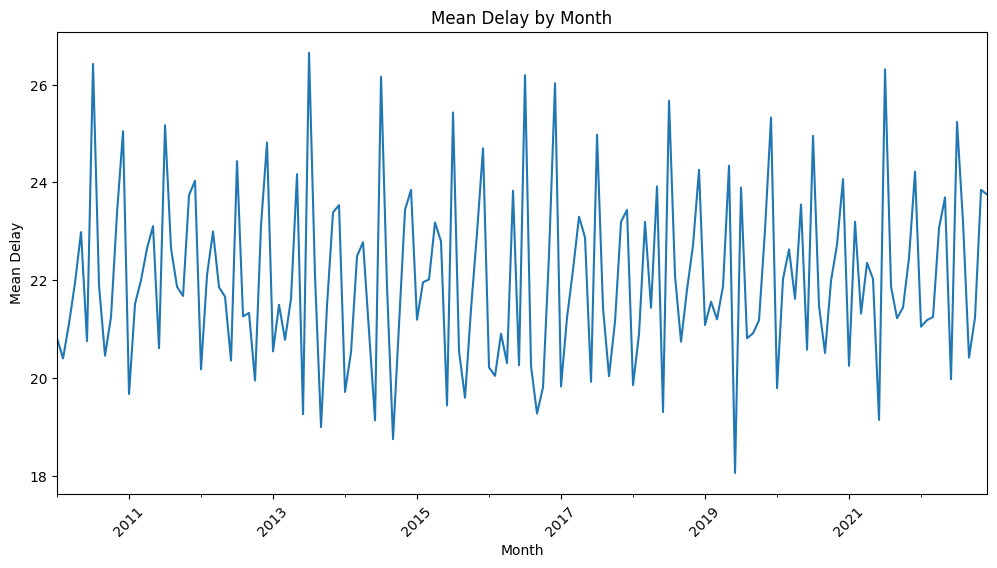

In [9]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by month and calculate the mean delay
mean_delay_by_month = df.groupby(df['date'].dt.to_period('M'))['delay'].mean()

# Create the graph
plt.figure(figsize=(12, 6))
mean_delay_by_month.plot(kind='line')
plt.title('Mean Delay by Month')
plt.xlabel('Month')
plt.ylabel('Mean Delay')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

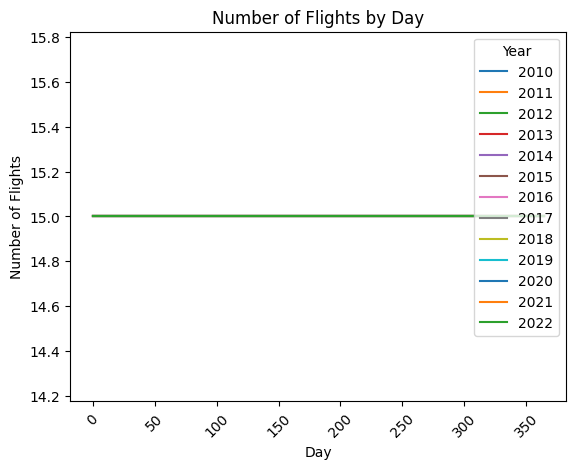

In [10]:
# Group the data by year and day, and calculate the count of flights
flight_count_by_year_day = df.groupby(['year', 'day'])['flight_id'].count().unstack('year')

# Create the graph
plt.figure(figsize=(12, 6))
flight_count_by_year_day.plot(kind='line')
plt.title('Number of Flights by Day')
plt.xlabel('Day')
plt.ylabel('Number of Flights')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()